# Library

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [3]:
#Load datasets
from google.colab import files
uploaded = files.upload()
data=pd.read_csv("diabetes.csv")
data.head()

Saving diabetes.csv to diabetes.csv


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data preprocessing

In [4]:
#Count total na values in dataframe
print(data.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


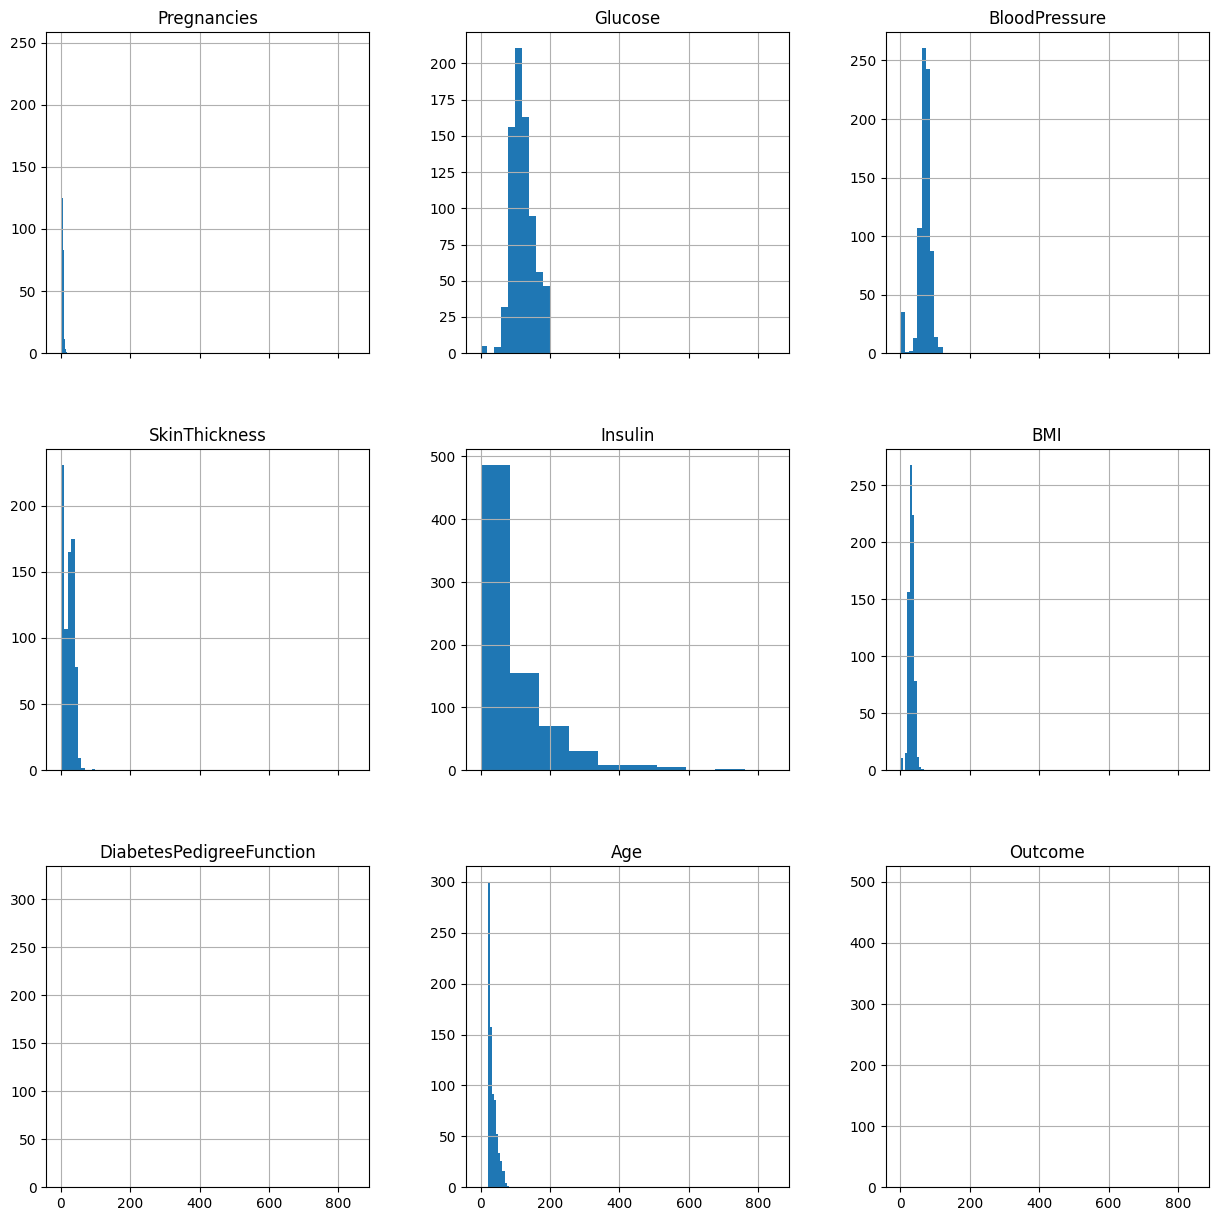

In [5]:
data.hist(bins=10, figsize=(15,15),sharex=True)
plt.show()

# (1) Z-score standardization

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Convert standardized data to dataFrame
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)

print(scaled_data)


     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1      -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2       1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3      -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.622642       0.356432       1.722735  0.870031  0.115169   
764    -0.547919  0.034598       0.046245       0.405445 -0.692891  0.610154   
765     0.342981  0.003301       0.149641       0.154533  0.279594 -0.735190   
766    -0.844885  0.159787      -0.470732      -1.288212 -0.692891 -0.240205   
767    -0.844885 -0.873019       0.046245       0.656358 -0.692891 -0.202129   

     DiabetesPedigreeFunction       Age

# Neural Network model 

In [14]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
np.random.seed(442)
x = data.iloc[:, 0:8].values
Y = data.iloc[:, 8].values

X_train_full, X_test, y_train_full, y_test = train_test_split(x, Y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

model = Sequential()
model.add(Dense(12,input_dim=8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_history = model.fit(X_train, y_train, epochs=150, batch_size=10, validation_data=(X_valid, y_valid))
scores = model.evaluate(x=x,y=Y)
print('\n%s:%.2f%%' %(model.metrics_names[1],scores[1]*100))


Epoch 1/150
44/44 [==============================] - 2s 12ms/step - loss: 13.8787 - accuracy: 0.4074 - val_loss: 5.8805 - val_accuracy: 0.4653
Epoch 2/150
44/44 [==============================] - 0s 6ms/step - loss: 3.8000 - accuracy: 0.5417 - val_loss: 2.7292 - val_accuracy: 0.6111
Epoch 3/150
44/44 [==============================] - 0s 3ms/step - loss: 2.3438 - accuracy: 0.5486 - val_loss: 1.8235 - val_accuracy: 0.6111
Epoch 4/150
44/44 [==============================] - 0s 3ms/step - loss: 1.5238 - accuracy: 0.5741 - val_loss: 1.0229 - val_accuracy: 0.6597
Epoch 5/150
44/44 [==============================] - 0s 3ms/step - loss: 0.9973 - accuracy: 0.6296 - val_loss: 0.7740 - val_accuracy: 0.6875
Epoch 6/150
44/44 [==============================] - 0s 3ms/step - loss: 0.8016 - accuracy: 0.6574 - val_loss: 0.6288 - val_accuracy: 0.7083
Epoch 7/150
44/44 [==============================] - 0s 3ms/step - loss: 0.7132 - accuracy: 0.6667 - val_loss: 0.6160 - val_accuracy: 0.7361
Epoch 8/150

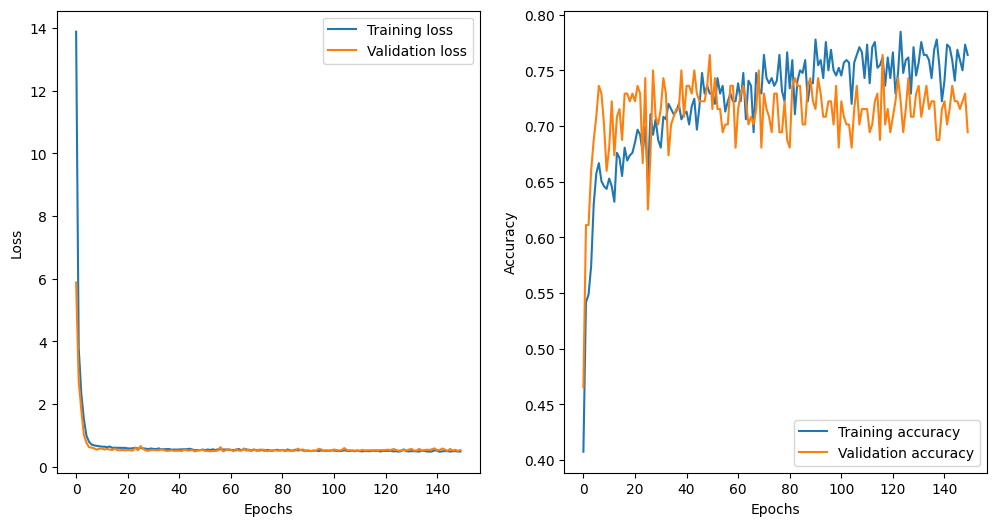

In [15]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(model_history.history['loss'], label='Training loss')
plt.plot(model_history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(model_history.history['accuracy'], label='Training accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [16]:
# Made predicitons
# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert predicted probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Print accuracy on the test set
test_acc = np.mean(y_pred_binary == y_test)
print("Test accuracy:", test_acc)

6/6 [==============================] - 0s 4ms/step
Test accuracy: 0.546875
